In [2]:
!mkdir -p ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle

In [4]:
!kaggle datasets download -d bhavikjikadara/dog-and-cat-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/bhavikjikadara/dog-and-cat-classification-dataset
License(s): apache-2.0
 96% 744M/775M [00:03<00:00, 231MB/s]
100% 775M/775M [00:03<00:00, 232MB/s]


In [5]:
!unzip dog-and-cat-classification-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5499.jpg  
  inflating: PetImages/Dog/55.jpg    
  inflating: PetImages/Dog/550.jpg   
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   

In [6]:
!mkdir train

In [7]:
!mkdir test

In [12]:
import os
import shutil
from sklearn.model_selection import train_test_split

In [13]:
folder_path_dog="/content/train/Dog"
folder_path_cat="/content/train/Cat"
dst_cat_path="/content/test/Cat"
dst_dog_path="/content/test/Dog"

In [14]:
cat_list=[]
new_dog_list=[]

for files_cat in os.listdir(folder_path_cat):
  cat_list.append(files_cat)

for files_dog in os.listdir(folder_path_dog):
  new_dog_list.append(files_dog)

In [15]:
Cat_train,Cat_test=train_test_split(cat_list,test_size=0.2,random_state=42)
Dog_train,Dog_test=train_test_split(new_dog_list,test_size=0.2,random_state=42)

In [16]:
for filenames in Cat_test:
  src=folder_path_cat+"/"+filenames
  dst=dst_cat_path+"/"+filenames
  shutil.move(src,dst)

In [17]:
for filename in Dog_test:
  src_dog=folder_path_dog+"/"+filename
  dst_dog=dst_dog_path+"/"+filename
  shutil.move(src_dog,dst_dog)


In [30]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,BatchNormalization
from tensorflow.keras.applications.vgg16 import VGG16

In [75]:
conv_base=VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
)

In [76]:
conv_base.trainable=True

In [77]:
set_trainable=False

for layer in conv_base.layers:
  if layer.name=="block5_conv1":
    set_trainable=True
  if set_trainable:
      layer.trainable=True
  else:
      layer.trainable=False

In [78]:
for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_layer_3 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [79]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [80]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [81]:
train_ds=tf.keras.utils.image_dataset_from_directory(
    directory="/content/train",
    labels="inferred",
    label_mode='int',
    batch_size=32,
    image_size=(150,150)
)

test_ds=tf.keras.utils.image_dataset_from_directory(
    directory="/content/test",
    labels="inferred",
    label_mode='int',
    batch_size=32,
    image_size=(150,150)
)


Found 19998 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [82]:
def normalize(image,label):
  image=tf.cast(image/255.,tf.float32)
  return image,label

train_ds=train_ds.map(normalize)
test_ds=test_ds.map(normalize)

In [83]:
model.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-5),metrics=["accuracy"])

In [84]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 9,177,089 (35.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [85]:
history=model.fit(train_ds,epochs=10,validation_data=(test_ds))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 94s 144ms/step - accuracy: 0.8497 - loss: 0.3309 - val_accuracy: 0.9382 - val_loss: 0.1552
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 137s 140ms/step - accuracy: 0.9415 - loss: 0.1446 - val_accuracy: 0.9442 - val_loss: 0.1421
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 89s 143ms/step - accuracy: 0.9600 - loss: 0.1003 - val_accuracy: 0.9456 - val_loss: 0.1377
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 90s 144ms/step - accuracy: 0.9757 - loss: 0.0703 - val_accuracy: 0.9482 - val_loss: 0.1310
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 91s 145ms/step - accuracy: 0.9847 - loss: 0.0473 - val_accuracy: 0.9510 - val_loss: 0.1316
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 91s 146ms/step - accuracy: 0.9914 - loss: 0.0311 - val_accuracy: 0.9550 - val_loss: 0.1329
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 91s 146ms/step - accuracy: 0.9959 - loss: 0.0197 - val_accuracy: 0.9564 - val_loss: 0.1382
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 97s 154ms/step - accuracy: 0.9969 - loss: 

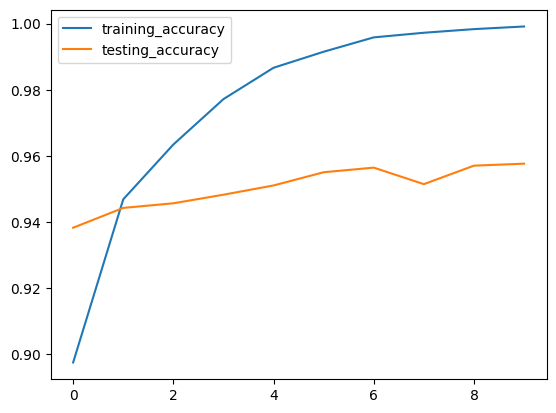

In [86]:
plt.plot(history.history["accuracy"],label="training_accuracy")
plt.plot(history.history["val_accuracy"],label="testing_accuracy")
plt.legend()

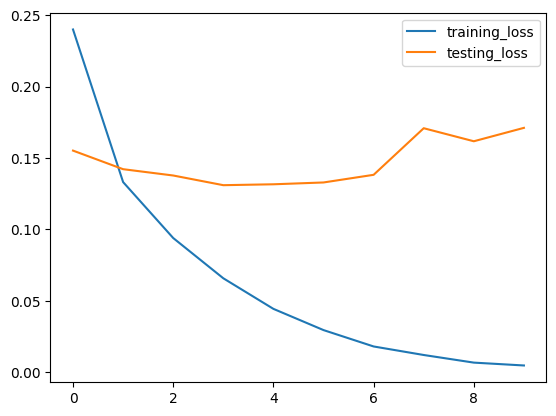

In [87]:
plt.plot(history.history["loss"],label="training_loss")
plt.plot(history.history["val_loss"],label="testing_loss")
plt.legend()